In [1]:
!pip install comet_ml

In [1]:
import comet_ml

In [2]:
from comet_ml import Experiment

In [3]:
comet = Experiment(api_key="KY2FKGd0W5CRZJiGgHVU5nHDu",
                        project_name="general", workspace="jolinda-hub")

COMET INFO: old comet version (3.1.11) detected. current: 3.1.12 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jolinda-hub/general/d253d0d6498a494985c9bd87a1b9980b



In [84]:
comet_sec = Experiment(api_key="KY2FKGd0W5CRZJiGgHVU5nHDu",
                        project_name="general", workspace="jolinda-hub")

COMET INFO: old comet version (3.1.11) detected. current: 3.1.12 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jolinda-hub/general/8f32339a191e4948b663df745eb01b81



In [87]:
# utilities
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
sns.set()

# nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import nltk
import re

# sklearn(classifier)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

#Metrics/Evaluation
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from collections import Counter 
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [88]:
train=pd.read_csv('train.csv')

In [89]:
test=pd.read_csv('test.csv')

In [90]:
train

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


In [91]:
all_sents = []
for i, row in train.iterrows():
    for post in row['message'].split('|||'):
        all_sents.append([row['sentiment'], post])
all_sents = pd.DataFrame(all_sents, columns=['sentiment', 'message'])

In [92]:
# Remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_sents['message'] = all_sents['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [93]:
# Make lower case
all_sents['message'] = all_sents['message'].str.lower()

In [94]:
# Strip out punctuation marks and numerals
import string
def remove_punctuation_numbers(message):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in message if l not in punc_numbers])

all_sents['message'] = all_sents['message'].apply(remove_punctuation_numbers)

In [95]:
sum_sents = all_sents[['sentiment', 'message']].groupby('sentiment').count()

In [96]:
all_sents

,sentiment,message
0,1,polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...
2,2,rt rawstory researchers say we have three year...
3,1,todayinmaker wired was a pivotal year in the...
4,1,rt soynoviodetodas its and a racist sexist cl...
...,...,...
15815,1,rt ezlusztig they took down the material on gl...
15816,2,rt washingtonpost how climate change could be ...
15817,0,notiven rt nytimesworld what does trump actual...
15818,-1,rt sarasmiles hey liberals the climate change ...


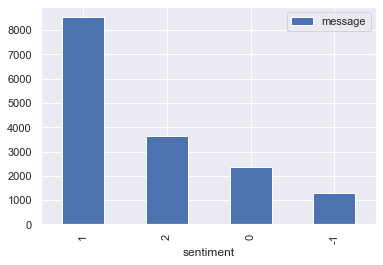

In [97]:
# Plot messages by sentiment classes
sum_sents.sort_values('message', ascending=False).plot(kind='bar')

In [98]:
# Let's use the count vectorizer with its default hyperparameters
vect = CountVectorizer()
X_count = vect.fit_transform(all_sents['message'])

In [99]:
vect_new = CountVectorizer(lowercase=True, stop_words='english',max_features=500,analyzer='word', ngram_range=(1, 3))
X_count = vect_new.fit_transform(all_sents['message'])

In [100]:
X = X_count.toarray()

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit label encoder and return encoded labels
y = le.fit_transform(all_sents['sentiment'])

In [102]:
# List of label encoder types to use for lookup 
type_labels = list(le.classes_)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
LogisticRegression = LogisticRegression()
##Fitting the model with train dataset
LogisticRegression = LogisticRegression.fit(X_train, y_train)

In [71]:
# Getting predicions from the X_test
predict = LogisticRegression.predict(X_test)
#Pritting the classification report
print(metrics.classification_report(y_test,predict))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predict))

              precision    recall  f1-score   support

           0       0.61      0.21      0.31       270
           1       0.54      0.36      0.43       446
           2       0.70      0.84      0.76      1729
           3       0.66      0.64      0.65       719

    accuracy                           0.67      3164
   macro avg       0.63      0.51      0.54      3164
weighted avg       0.66      0.67      0.65      3164

0.672882427307206


In [108]:
f1_logreg = f1_score(y_test, pred1, average='macro')
precision_logreg = precision_score(y_test, pred1, average='macro')
recall_logreg = recall_score(y_test, pred1, average='macro')

In [109]:
params = {"random_state": 27,
          "model_type": "logreg",
          "scaler": "standard scaler"
          }
metrics = {"f1_logreg": f1_logreg,
           "recall_svc": recall_logreg,
           "precision_svc": precision_logreg
           }

In [110]:
comet_sec.log_parameters(params)
comet_sec.log_metrics(metrics)

In [72]:
LinearSVC = LinearSVC()
##Fitting the model with train dataset
LinearSVC = LinearSVC.fit(X_train, y_train)

In [73]:
# Getting predicions from the X_test
pred1 = LinearSVC.predict(X_test)
#Printing the classification report
print(metrics.classification_report(y_test, pred1))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,pred1))

              precision    recall  f1-score   support

           0       0.61      0.17      0.27       270
           1       0.52      0.28      0.36       446
           2       0.69      0.85      0.76      1729
           3       0.65      0.66      0.65       719

    accuracy                           0.67      3164
   macro avg       0.62      0.49      0.51      3164
weighted avg       0.65      0.67      0.64      3164

0.665929203539823


In [74]:
f1_svc = f1_score(y_test, pred1, average='macro')
precision_svc = precision_score(y_test, pred1, average='macro')
recall_svc = recall_score(y_test, pred1, average='macro')

In [75]:
params = {"random_state": 27,
          "model_type": "LinearSVC",
          "scaler": "standard scaler"
          }
metrics = {"f1_svc": f1_svc,
           "recall_svc": recall_svc,
           "precision_svc": precision_svc
           }

In [76]:
comet.log_parameters(params)
comet.log_metrics(metrics)

In [105]:
BNBmodel = BernoulliNB(alpha = 2)
##Fitting the model with train dataset
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2)

In [106]:
# Getting predictions from the X_test
pred4 = BNBmodel.predict(X_test)
#Priting the classification report
print(metrics.classification_report(y_test,pred4))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,pred4))

              precision    recall  f1-score   support

           0       0.32      0.24      0.27       270
           1       0.35      0.51      0.41       446
           2       0.81      0.51      0.63      1729
           3       0.50      0.84      0.62       719

    accuracy                           0.56      3164
   macro avg       0.49      0.52      0.48      3164
weighted avg       0.63      0.56      0.57      3164

0.5619469026548672


In [28]:
MultinomialNB = MultinomialNB()
##Fitting the model with train dataset
MultinomialNB  = MultinomialNB .fit(X_train, y_train)

In [29]:
# Getting predictions from the X_test
pred3 = MultinomialNB.predict(X_test)
#Priting the classification report
print(metrics.classification_report(y_test,pred3))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,pred3))

              precision    recall  f1-score   support

           0       0.36      0.29      0.32       270
           1       0.31      0.44      0.36       446
           2       0.78      0.51      0.62      1729
           3       0.51      0.83      0.63       719

    accuracy                           0.56      3164
   macro avg       0.49      0.52      0.48      3164
weighted avg       0.61      0.56      0.56      3164

0.5553097345132744


Text(0, 0.5, '# of observations')

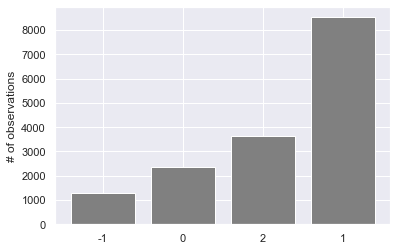

In [30]:
heights = [len(y[y == label]) for label in range(len(type_labels))]
bars = pd.DataFrame(zip(heights,le.transform(type_labels).T, type_labels), columns=['heights','labels','names'])
bars = bars.sort_values(by='heights',ascending=True)

plt.bar(range(len(bars)),bars['heights'],color='grey')
plt.xticks(range(len(bars)),bars['names'])
plt.ylabel("# of observations")

In [31]:
# Let's pick a class size of roughly half the size of the largest size
class_size = 30000

In [32]:
data = np.concatenate([X, y[:,np.newaxis]], axis=1)

In [33]:
bar_label_df = bars.set_index('labels')

In [34]:
resampled_classes = []

# For each label
for label in range(len(type_labels)):
    # Get num. of observations from this class
    label_size = bar_label_df.loc[label]['heights']
    
    # If label_size < class size the upsample, else downsample
    if label_size < class_size:
        # Upsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=True, # sample with replacement (we need to duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
    else:
        # Downsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=False, # sample without replacement (no need for duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
        
    resampled_classes.append(label_resampled)

In [35]:
resampled_data = np.concatenate(resampled_classes, axis=0)

In [36]:
resampled_data.shape

(120000, 501)

In [37]:
X_resampled = resampled_data[:,:-1]

In [38]:
y_resampled = resampled_data[:,-1]

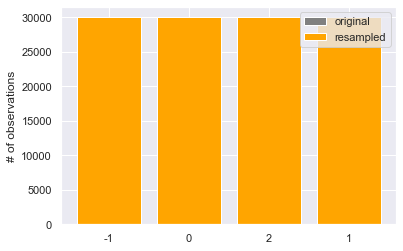

In [39]:
heights = [len(y_resampled[y_resampled == label]) for label in range(len(type_labels))]
bars_resampled = pd.DataFrame(zip(heights,le.transform(type_labels).T, type_labels), columns=['heights','labels','names'])
bars_resampled = bars_resampled.sort_values(by='heights',ascending=True)

plt.bar(range(len(bars)),bars['heights'],color='grey')
plt.bar(range(len(bars_resampled)),bars_resampled['heights'],color='orange')
plt.xticks(range(len(bars)),bars['names'])
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

In [40]:
# Setting up the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=27)

In [43]:
LogisticRegression = LogisticRegression()
##Fitting the model with train dataset
LogisticRegression = LogisticRegression.fit(X_train, y_train)

In [44]:
# Getting predicions from the X_test
predict = LogisticRegression.predict(X_test)
#Pritting the classification report
print(metrics.classification_report(y_test,predict))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predict))

              precision    recall  f1-score   support

           0       0.63      0.60      0.61      5948
           1       0.56      0.61      0.58      6054
           2       0.65      0.53      0.58      5990
           3       0.70      0.80      0.75      6008

    accuracy                           0.63     24000
   macro avg       0.63      0.63      0.63     24000
weighted avg       0.63      0.63      0.63     24000

0.6334166666666666


In [45]:
LinearSVC = LinearSVC()
##Fitting the model with train dataset
LinearSVC_up = LinearSVC.fit(X_train, y_train)

In [46]:
# Getting predicions from the X_test
predict1 = LinearSVC_up.predict(X_test)
#Printing the classification report
print(metrics.classification_report(y_test, predict1))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predict1))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61      5948
           1       0.56      0.59      0.57      6054
           2       0.67      0.51      0.58      5990
           3       0.67      0.84      0.75      6008

    accuracy                           0.63     24000
   macro avg       0.63      0.63      0.63     24000
weighted avg       0.63      0.63      0.63     24000

0.631625


In [ ]:
comet.log_parameters(params2)
comet.log_metrics(metrics2)

In [47]:
BNBmodel = BernoulliNB(alpha = 2)
##Fitting the model with train dataset
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2)

In [48]:
# Getting predictions from the X_test
predict4 = BNBmodel.predict(X_test)
#Priting the classification report
print(metrics.classification_report(y_test,predict4))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predict4))

              precision    recall  f1-score   support

           0       0.61      0.48      0.53      5948
           1       0.50      0.57      0.53      6054
           2       0.63      0.38      0.47      5990
           3       0.57      0.84      0.68      6008

    accuracy                           0.57     24000
   macro avg       0.58      0.57      0.55     24000
weighted avg       0.58      0.57      0.55     24000

0.5659583333333333


In [49]:
MultinomialNB = MultinomialNB()
##Fitting the model with train dataset
MultinomialNB  = MultinomialNB .fit(X_train, y_train)

In [50]:
# Getting predictions from the X_test
predict3 = MultinomialNB.predict(X_test)
#Priting the classification report
print(metrics.classification_report(y_test,predict3))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predict3))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55      5948
           1       0.48      0.52      0.50      6054
           2       0.66      0.33      0.44      5990
           3       0.55      0.85      0.67      6008

    accuracy                           0.55     24000
   macro avg       0.57      0.55      0.54     24000
weighted avg       0.57      0.55      0.54     24000

0.5549166666666666


In [77]:
comet.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jolinda-hub/general/d253d0d6498a494985c9bd87a1b9980b
COMET INFO:   Metrics:
COMET INFO:     f1_svc        : 0.511051836853553
COMET INFO:     precision_svc : 0.6177990471267255
COMET INFO:     recall_svc    : 0.48886596567633017
COMET INFO:   Parameters [count]:
COMET INFO:     C                 : 1.0
COMET INFO:     alpha [4]         : 1.0
COMET INFO:     binarize          : 1
COMET INFO:     class_prior       : 1
COMET INFO:     class_weight      : 1
COMET INFO:     dual              : 1
COMET INFO:     fit_intercept     : True
COMET INFO:     fit_prior         : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : LinearSVC
COMET INFO:     mu

In [111]:
comet_sec.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jolinda-hub/general/8f32339a191e4948b663df745eb01b81
COMET INFO:   Metrics:
COMET INFO:     f1_logreg     : 0.511051836853553
COMET INFO:     precision_svc : 0.6177990471267255
COMET INFO:     recall_svc    : 0.48886596567633017
COMET INFO:   Parameters:
COMET INFO:     alpha        : 2
COMET INFO:     binarize     : 1
COMET INFO:     class_prior  : 1
COMET INFO:     fit_prior    : True
COMET INFO:     model_type   : logreg
COMET INFO:     random_state : 27
COMET INFO:     scaler       : standard scaler
COMET INFO:   Uploads:
COMET INFO:     code                : 1 (21 KB)
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO: -----

In [79]:
comet.display()

In [112]:
comet_sec.display()